Integrantes: Paulina Duque, Constanza Ríos
Solicitamos ayuda de compañero Vittorio Pesenti


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [72]:
#Info Ministerio de Salud
cuarentenas_df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob'
                                  '/master/output/producto29/Cuarentenas-Totales.csv?raw=true',
                                  encoding = 'utf-8' , sep = ',')

In [73]:
cuarentenas_df.head()

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13


In [77]:
#Notamos que Codigo CUT Comuna difiere de Codigo comuna de poblacion, tanto en numero (Int vs float) como en nombre,
#se renombrara CUT aqui, y mas abajo se cambiara float por int
#Cambiar nombre de Codigo CUT Comuna a Codigo comuna
cuarentenas_df = cuarentenas_df.rename(columns = {'Código CUT Comuna': 'Codigo comuna'}, inplace = False)

In [79]:
#Eliminar columnas que no usaremos
cuarentenas1_df = cuarentenas_df.drop(columns='Estado')
cuarentenas2_df = cuarentenas1_df.drop(columns='Alcance')
cuarentenas3_df = cuarentenas2_df.drop(columns='Detalle')
cuarentenas4_df = cuarentenas3_df.drop(columns='Superficie en m2')
cuarentenas5_df = cuarentenas4_df.drop(columns='Perímetro en m')
cuarentenareal_df = cuarentenas5_df.drop(columns='n_REGION')


In [80]:
cuarentenareal_df.head()

,ID,Nombre,Fecha de Inicio,Fecha de Término,Codigo comuna,Region
0,1,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15
1,2,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13
2,3,Puente Alto Poniente,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13
3,4,El Bosque,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13
4,5,San Bernardo Nororiente,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13


In [83]:
#Info de las poblaiones de cada region
poblacion1_df = pd.read_csv ('https://github.com/MinCiencia/Datos-COVID19/blob'
                            '/master/output/producto1/Covid-19.csv?raw=true', encoding = 'utf-8', sep = ',')

In [84]:
poblacion1_df.head() #Se comprueba la extraccion correcta de los datos

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31125.0,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,12810.6
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,NaN


In [86]:
#Eliminar columnas que no usaremos
poblacion_df = poblacion1_df [['Codigo region', 'Codigo comuna', 'Region', 'Comuna', 'Poblacion']] 

In [87]:
poblacion_df.head()

,Codigo region,Codigo comuna,Region,Comuna,Poblacion
0,15,15101.0,Arica y Parinacota,Arica,247552.0
1,15,15102.0,Arica y Parinacota,Camarones,1233.0
2,15,15202.0,Arica y Parinacota,General Lagos,810.0
3,15,15201.0,Arica y Parinacota,Putre,2515.0
4,15,NaN,Arica y Parinacota,Desconocido Arica y Parinacota,NaN


In [88]:
#Cambiar el nombre de Codigo region por Region para coincidir con cuarentenareal
#Se eliminn NaN en Poblacion y comuna
poblacion_df = poblacion_df.rename(columns = {'Region': 'Nombre', 'Codigo region': 'Region'}, inplace = False)
poblacion_df = poblacion_df.dropna()

In [89]:
poblacion_df.head()

,Region,Codigo comuna,Nombre,Comuna,Poblacion
0,15,15101.0,Arica y Parinacota,Arica,247552.0
1,15,15102.0,Arica y Parinacota,Camarones,1233.0
2,15,15202.0,Arica y Parinacota,General Lagos,810.0
3,15,15201.0,Arica y Parinacota,Putre,2515.0
5,1,1107.0,Tarapacá,Alto Hospicio,129999.0


In [16]:
poblacion_df['Codigo comuna'].astype(int)

0      15101
1      15102
2      15202
3      15201
5       1107
       ...  
356    12101
357    12103
358    12104
359    12303
360    12402
Name: Codigo comuna, Length: 346, dtype: int32

In [90]:
df = cuarentenareal_df.merge(poblacion_df, on='Codigo comuna')
df.head()
#Combinar cuarentenareal con poblacion por Codigo de comuna

,ID,Nombre_x,Fecha de Inicio,Fecha de Término,Codigo comuna,Region_x,Region_y,Nombre_y,Comuna,Poblacion
0,1,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15,15,Arica y Parinacota,Arica,247552.0
1,99,Arica Re-Ingreso urbano,2020-07-14 22:00:00,2020-11-09 05:00:00,15101,15,15,Arica y Parinacota,Arica,247552.0
2,2,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13,13,Metropolitana,Santiago,503147.0
3,18,Santiago,2020-03-26 21:00:00,2020-04-13 05:00:00,13101,13,13,Metropolitana,Santiago,503147.0
4,40,Santiago Extensión a Total,2020-05-05 22:00:00,2020-08-17 05:00:00,13101,13,13,Metropolitana,Santiago,503147.0


In [94]:
#Ordenar
df_1 = df.drop(columns='Region_y')
df_2 = df_1.drop(columns='Nombre_y')
df_real = df_2.rename(columns = {'Nombre_x': 'Nombre', 'Region_x': 'Region'}, inplace = False)

In [96]:
df_real.head() #comprobamos que se hayan cambiado correctamente

,ID,Nombre,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Comuna,Poblacion
0,1,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15,Arica,247552.0
1,99,Arica Re-Ingreso urbano,2020-07-14 22:00:00,2020-11-09 05:00:00,15101,15,Arica,247552.0
2,2,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13,Santiago,503147.0
3,18,Santiago,2020-03-26 21:00:00,2020-04-13 05:00:00,13101,13,Santiago,503147.0
4,40,Santiago Extensión a Total,2020-05-05 22:00:00,2020-08-17 05:00:00,13101,13,Santiago,503147.0


In [97]:
#Cambiar la fecha a date, y la poblacion de float a int
df_real['Poblacion'] = df_real['Poblacion'].astype(int)
df_real['Fecha de Inicio'] = pd.to_datetime(df_real['Fecha de Inicio']) 
df_real['Fecha de Término'] = pd.to_datetime(df_1['Fecha de Término']) 

In [98]:
#Eliminar horarios de fechas
df_real['Fecha de Inicio'] = df_real['Fecha de Inicio'].dt.date
df_real['Fecha de Término'] = df_real['Fecha de Término'].dt.date


In [99]:
df_real.info()  #ver que la poblcion haya cambiado a int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                187 non-null    int64 
 1   Nombre            187 non-null    object
 2   Fecha de Inicio   187 non-null    object
 3   Fecha de Término  187 non-null    object
 4   Codigo comuna     187 non-null    int64 
 5   Region            187 non-null    int64 
 6   Comuna            187 non-null    object
 7   Poblacion         187 non-null    int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 12.4+ KB


In [100]:
#Repetir el codigo para cambiar formato fecha para volver de obj a date
df_real['Fecha de Inicio'] = pd.to_datetime(df_real['Fecha de Inicio'])
df_real['Fecha de Término'] = pd.to_datetime(df_real['Fecha de Término'])

In [102]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                187 non-null    int64         
 1   Nombre            187 non-null    object        
 2   Fecha de Inicio   187 non-null    datetime64[ns]
 3   Fecha de Término  187 non-null    datetime64[ns]
 4   Codigo comuna     187 non-null    int64         
 5   Region            187 non-null    int64         
 6   Comuna            187 non-null    object        
 7   Poblacion         187 non-null    int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(2)
memory usage: 12.4+ KB


In [103]:
df_real.head()

,ID,Nombre,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Comuna,Poblacion
0,1,Arica,2020-04-16,2020-05-15,15101,15,Arica,247552
1,99,Arica Re-Ingreso urbano,2020-07-14,2020-11-09,15101,15,Arica,247552
2,2,Santiago Norte,2020-04-13,2020-05-05,13101,13,Santiago,503147
3,18,Santiago,2020-03-26,2020-04-13,13101,13,Santiago,503147
4,40,Santiago Extensión a Total,2020-05-05,2020-08-17,13101,13,Santiago,503147


In [104]:
#Cambiar fechas DD / MM / AA
df_real['Fecha de Inicio'] = df_real['Fecha de Inicio'].dt.strftime('%d-%m-%Y')
df_real['Fecha de Término'] = df_real['Fecha de Término'].dt.strftime('%d-%m-%Y')

In [105]:
df_real[['Fecha de Inicio','Fecha de Término']]

,Fecha de Inicio,Fecha de Término
0,16-04-2020,15-05-2020
1,14-07-2020,09-11-2020
2,13-04-2020,05-05-2020
3,26-03-2020,13-04-2020
4,05-05-2020,17-08-2020
...,...,...
182,10-12-2020,25-12-2020
183,10-12-2020,23-12-2020
184,12-12-2020,25-12-2020
185,12-12-2020,23-12-2020


In [106]:
df_real.head() #comprobamos en la df general

,ID,Nombre,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Comuna,Poblacion
0,1,Arica,16-04-2020,15-05-2020,15101,15,Arica,247552
1,99,Arica Re-Ingreso urbano,14-07-2020,09-11-2020,15101,15,Arica,247552
2,2,Santiago Norte,13-04-2020,05-05-2020,13101,13,Santiago,503147
3,18,Santiago,26-03-2020,13-04-2020,13101,13,Santiago,503147
4,40,Santiago Extensión a Total,05-05-2020,17-08-2020,13101,13,Santiago,503147


In [112]:
#Numero de personas en cuarentena por Region al dia de inicio de la misma:
df_2 = df_real.groupby(['Region','Fecha de Inicio']).Poblacion.sum()
df_2.to_frame(name='Poblacion')
df_3 = df_2.to_frame().reset_index()
df_3

,Region,Fecha de Inicio,Poblacion
0,1,12-06-2020,17395
1,1,15-05-2020,353462
2,2,05-05-2020,440501
3,2,12-06-2020,190336
4,2,23-06-2020,468580
...,...,...,...
84,15,14-07-2020,247552
85,15,16-04-2020,247552
86,16,02-09-2020,232451
87,16,03-10-2020,28375


In [113]:
#Numero de personas en cuarentena por Region al dia de fin de la cuarentena:
df_2 = df_real.groupby(['Region','Fecha de Término']).Poblacion.sum()
df_2.to_frame(name='Poblacion')
df_3 = df_2.to_frame().reset_index()
df_3

,Region,Fecha de Término,Poblacion
0,1,03-10-2020,353462
1,1,28-09-2020,17395
2,2,10-08-2020,28079
3,2,21-09-2020,190336
4,2,28-09-2020,440501
...,...,...,...
87,15,09-11-2020,247552
88,15,15-05-2020,247552
89,16,03-10-2020,232451
90,16,23-04-2020,232451


In [114]:
#Tabla general con poblacion por inicio / termino en cada region:
df_2 = df_real.groupby(['Region','Fecha de Inicio', 'Fecha de Término']).Poblacion.sum()
df_2.to_frame(name='Poblacion')
df_5 = df_2.to_frame().reset_index()
df_5

,Region,Fecha de Inicio,Fecha de Término,Poblacion
0,1,12-06-2020,28-09-2020,17395
1,1,15-05-2020,03-10-2020,353462
2,2,05-05-2020,29-05-2020,440501
3,2,12-06-2020,21-09-2020,190336
4,2,23-06-2020,10-08-2020,28079
...,...,...,...,...
131,15,14-07-2020,09-11-2020,247552
132,15,16-04-2020,15-05-2020,247552
133,16,02-09-2020,03-10-2020,232451
134,16,03-10-2020,26-10-2020,28375


In [115]:
#Definir los data de cada region, sin embargo debemos eliminar los NaN que se generan por la igualdad
#para lo cual usamos dropna

#ESTE CODIGO SE OBTUVO DEL GRUPO CON INTEGRANTES: NEELY, PAZ, PESENTI, NIETO, GODOY, GUZMAN, VARAS.

Reg_1 = df_5.where(df_5['Region']==1)
Reg_1 = Reg_1.dropna()
Reg_2 = df_5.where(df_5['Region']==2)
Reg_2 = Reg_2.dropna()
Reg_3 = df_5.where(df_5['Region']==3)
Reg_3 = Reg_3.dropna()
Reg_4 = df_5.where(df_5['Region']==4)
Reg_4 = Reg_4.dropna()
Reg_5 = df_5.where(df_5['Region']==5)
Reg_5 = Reg_5.dropna()
Reg_6 = df_5.where(df_5['Region']==6)
Reg_6 = Reg_6.dropna()
Reg_7 = df_5.where(df_5['Region']==7)
Reg_7 = Reg_7.dropna()
Reg_8 = df_5.where(df_5['Region']==8)
Reg_8 = Reg_8.dropna()
Reg_9 = df_5.where(df_5['Region']==9)
Reg_9 = Reg_9.dropna()
Reg_10 = df_5.where(df_5['Region']==10)
Reg_10 = Reg_10.dropna()
Reg_11 = df_5.where(df_5['Region']==11)
Reg_11 = Reg_11.dropna()
Reg_12 = df_5.where(df_5['Region']==12)
Reg_12 = Reg_12.dropna()
Reg_13 = df_5.where(df_5['Region']==13)
Reg_13 = Reg_13.dropna()
Reg_14 = df_5.where(df_5['Region']==14)
Reg_14 = Reg_14.dropna()
Reg_15 = df_5.where(df_5['Region']==15)
Reg_15 = Reg_15.dropna()
Reg_16 = df_5.where(df_5['Region']==16)
Reg_16 = Reg_16.dropna()

In [116]:
Reg_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            2 non-null      float64
 1   Fecha de Inicio   2 non-null      object 
 2   Fecha de Término  2 non-null      object 
 3   Poblacion         2 non-null      float64
dtypes: float64(2), object(2)
memory usage: 80.0+ bytes


In [117]:
Reg_1['Fecha de Inicio'] = pd.to_datetime(Reg_1['Fecha de Inicio'])
Reg_1['Fecha de Término'] = pd.to_datetime(Reg_1['Fecha de Término'])
Reg_2['Fecha de Inicio'] = pd.to_datetime(Reg_2['Fecha de Inicio'])
Reg_2['Fecha de Término'] = pd.to_datetime(Reg_2['Fecha de Término'])
Reg_3['Fecha de Inicio'] = pd.to_datetime(Reg_3['Fecha de Inicio'])
Reg_3['Fecha de Término'] = pd.to_datetime(Reg_3['Fecha de Término'])
Reg_4['Fecha de Inicio'] = pd.to_datetime(Reg_4['Fecha de Inicio'])
Reg_4['Fecha de Término'] = pd.to_datetime(Reg_4['Fecha de Término'])
Reg_5['Fecha de Inicio'] = pd.to_datetime(Reg_5['Fecha de Inicio'])
Reg_5['Fecha de Término'] = pd.to_datetime(Reg_5['Fecha de Término'])
Reg_6['Fecha de Inicio'] = pd.to_datetime(Reg_6['Fecha de Inicio'])
Reg_6['Fecha de Término'] = pd.to_datetime(Reg_6['Fecha de Término'])
Reg_7['Fecha de Inicio'] = pd.to_datetime(Reg_7['Fecha de Inicio'])
Reg_7['Fecha de Término'] = pd.to_datetime(Reg_7['Fecha de Término'])
Reg_8['Fecha de Inicio'] = pd.to_datetime(Reg_8['Fecha de Inicio'])
Reg_8['Fecha de Término'] = pd.to_datetime(Reg_8['Fecha de Término'])
Reg_9['Fecha de Inicio'] = pd.to_datetime(Reg_9['Fecha de Inicio'])
Reg_9['Fecha de Término'] = pd.to_datetime(Reg_9['Fecha de Término'])
Reg_10['Fecha de Inicio'] = pd.to_datetime(Reg_10['Fecha de Inicio'])
Reg_10['Fecha de Término'] = pd.to_datetime(Reg_10['Fecha de Término'])
Reg_11['Fecha de Inicio'] = pd.to_datetime(Reg_11['Fecha de Inicio'])
Reg_11['Fecha de Término'] = pd.to_datetime(Reg_11['Fecha de Término'])
Reg_12['Fecha de Inicio'] = pd.to_datetime(Reg_12['Fecha de Inicio'])
Reg_12['Fecha de Término'] = pd.to_datetime(Reg_12['Fecha de Término'])
Reg_13['Fecha de Inicio'] = pd.to_datetime(Reg_13['Fecha de Inicio'])
Reg_13['Fecha de Término'] = pd.to_datetime(Reg_13['Fecha de Término'])
Reg_14['Fecha de Inicio'] = pd.to_datetime(Reg_14['Fecha de Inicio'])
Reg_14['Fecha de Término'] = pd.to_datetime(Reg_14['Fecha de Término'])
Reg_15['Fecha de Inicio'] = pd.to_datetime(Reg_15['Fecha de Inicio'])
Reg_15['Fecha de Término'] = pd.to_datetime(Reg_15['Fecha de Término'])
Reg_16['Fecha de Inicio'] = pd.to_datetime(Reg_16['Fecha de Inicio'])
Reg_16['Fecha de Término'] = pd.to_datetime(Reg_16['Fecha de Término'])

In [118]:
Reg_1

,Region,Fecha de Inicio,Fecha de Término,Poblacion
0,1.0,2020-12-06,2020-09-28,17395.0
1,1.0,2020-05-15,2020-03-10,353462.0


<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

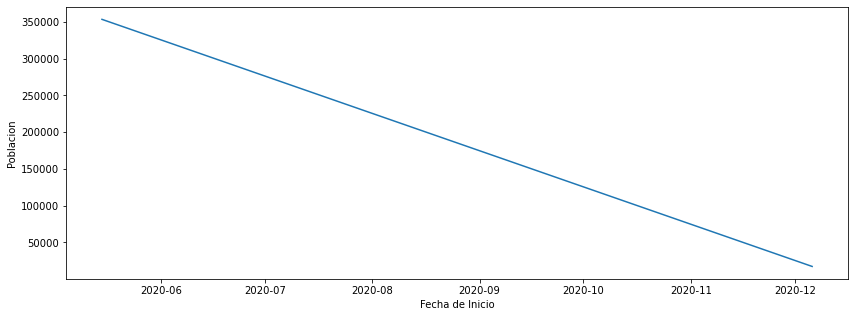

In [119]:
#Grafico para numero total de personas en cuarentena en la Primera Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_1)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

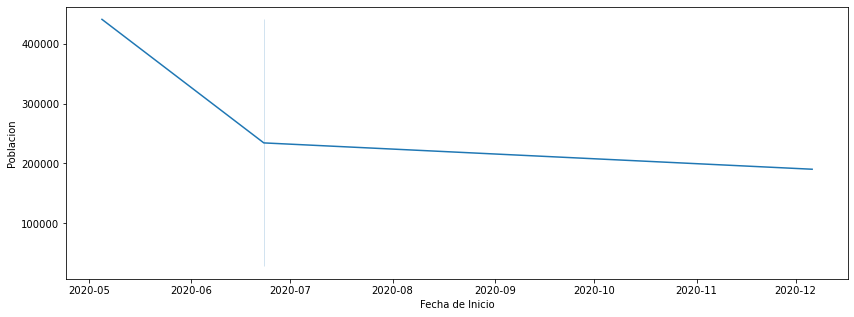

In [120]:
#Grafico para numero total de personas en cuarentena en la Segunda Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_2)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

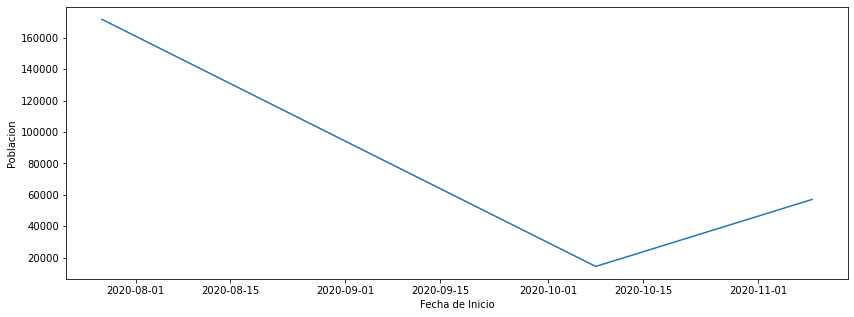

In [121]:
#Grafico para numero total de personas en cuarentena en la Tercera Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_3)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

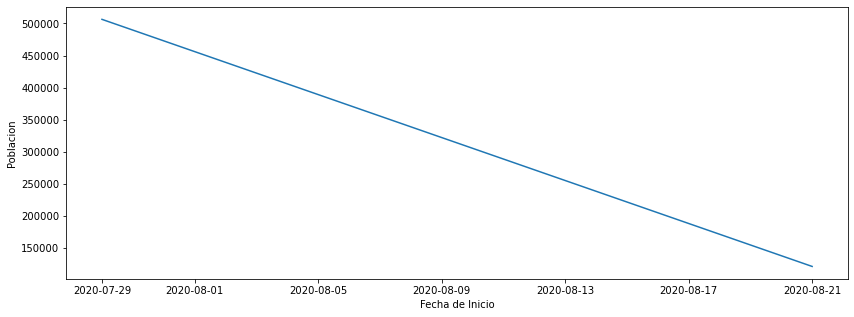

In [122]:
#Grafico para numero total de personas en cuarentena en la Cuarta Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_4)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

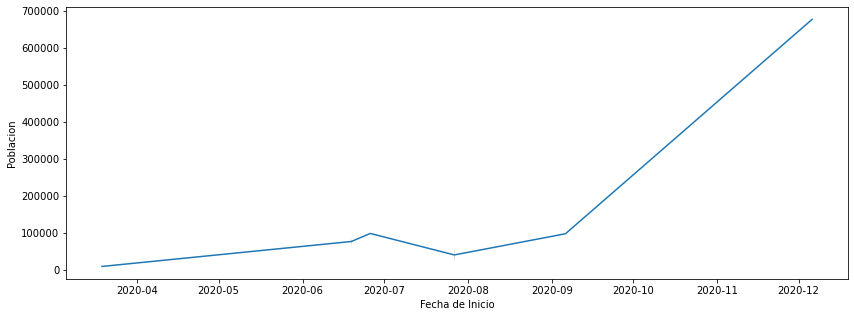

In [123]:
#Grafico para numero total de personas en cuarentena en la Quinta Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_5)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

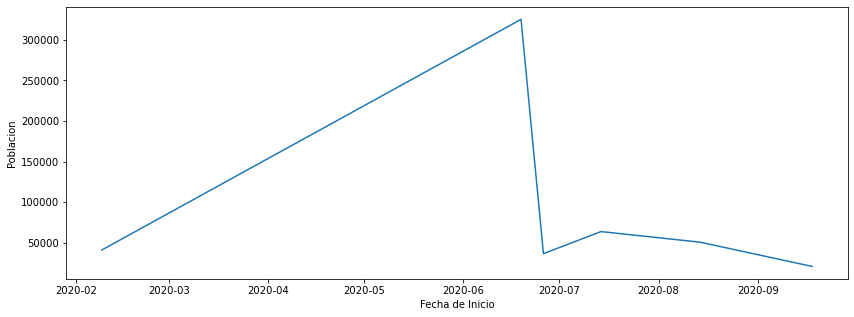

In [124]:
#Grafico para numero total de personas en cuarentena en la Sexta Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_6)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

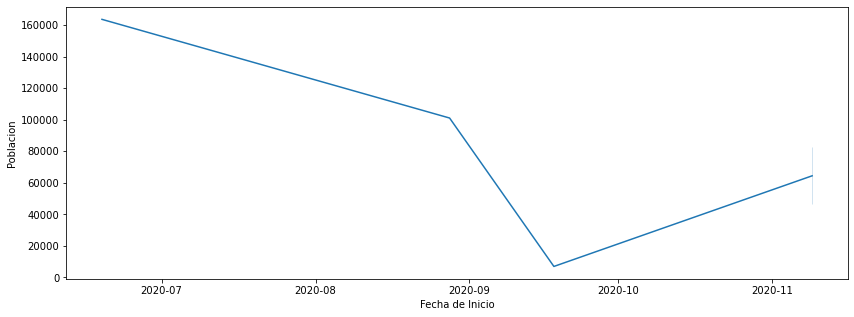

In [125]:
#Grafico para numero total de personas en cuarentena en la Septima Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_7)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

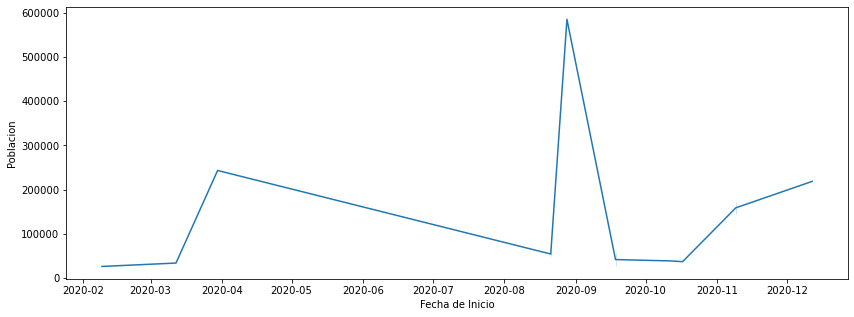

In [126]:
#Grafico para numero total de personas en cuarentena en la Octava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_8)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

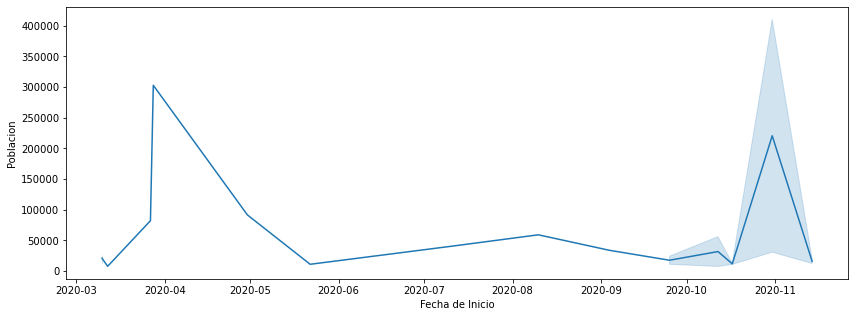

In [127]:
#Grafico para numero total de personas en cuarentena en la Novena Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_9)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

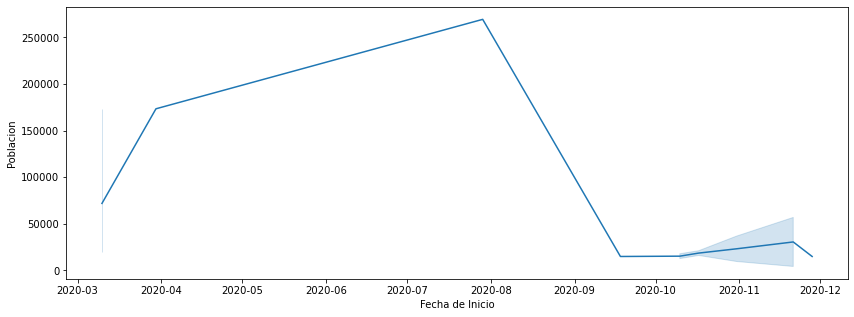

In [128]:
#Grafico para numero total de personas en cuarentena en la Decima Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_10)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

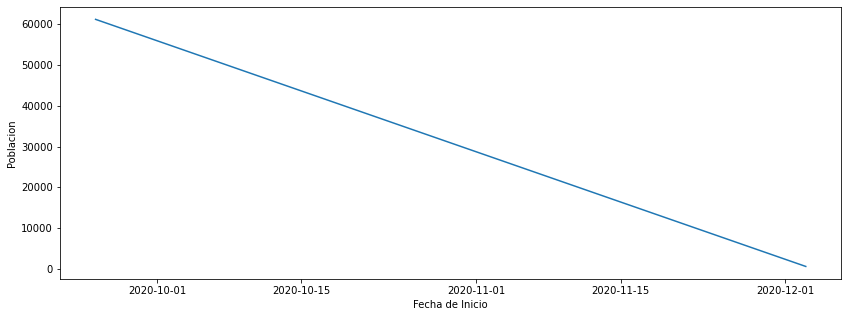

In [129]:
#Grafico para numero total de personas en cuarentena en la Onceava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_11)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

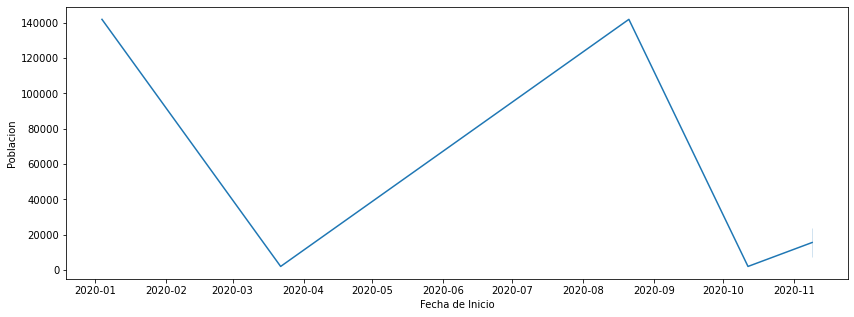

In [130]:
#Grafico para numero total de personas en cuarentena en la Doceava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_12)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

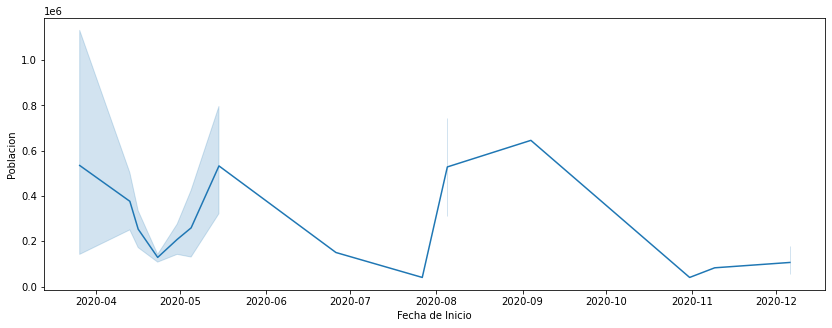

In [131]:
#Grafico para numero total de personas en cuarentena en la Treceava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_13)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

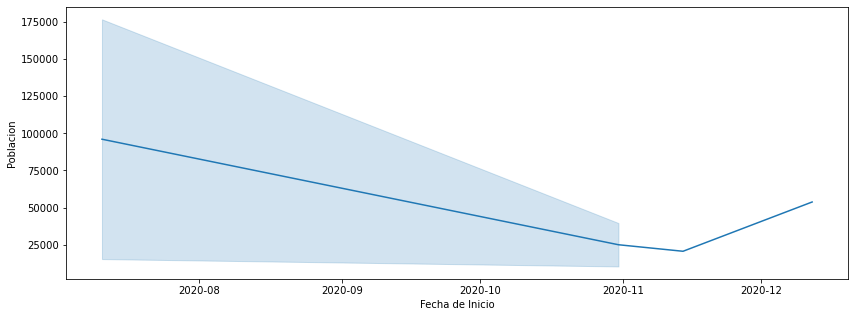

In [132]:
#Grafico para numero total de personas en cuarentena en la Catorceava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_14)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

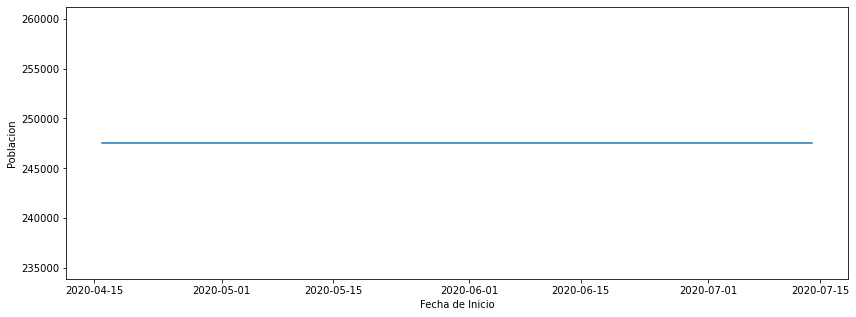

In [133]:
#Grafico para numero total de personas en cuarentena en la Quinceava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_15)

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

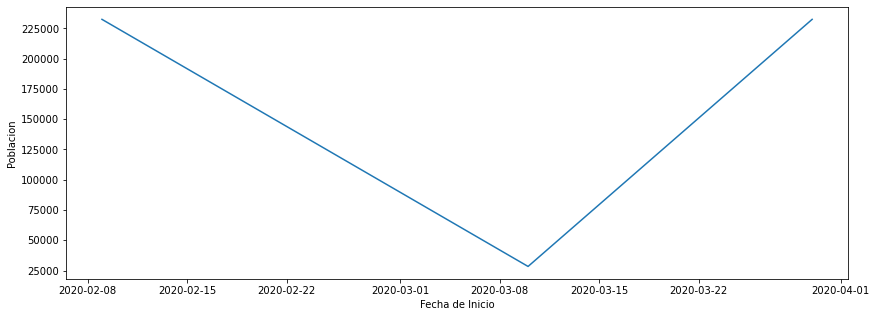

In [134]:
#Grafico para numero total de personas en cuarentena en la Dieciseisava Region
plt.figure(figsize = (14,5))
sns.lineplot (x = 'Fecha de Inicio', y = 'Poblacion', data = Reg_16)